#AI Project Cycle
1. Problem Scoping
2. Data Preparation
3. Modelling
4. Deployment

#1. Problem Scoping


1.   Problem Definition


> Banyak uang palsu yang beredar di masyarakat.

2.   Purpose:


> Build ML model to detect counterfeit money


3.   Objectives

> a. To use classlification ML model to determine counterfeit banknotes.

> b. To use features obtained from bank note digitalisation with industrial camera



4.   Data Requirements


> 1. Dataset :  "Banknote Authentication"


> a. Source - https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip


> b. Features extracted from wavelet transfrom of banknotes image - Variance, Skewness, Curtosis, Entropy











In [ ]:
url = 'https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip'

##2. Data Preparation

###1. Data Collection

In [ ]:
#Check file extension to be downloaded
# import os

#get the name of the from the last backslah
file_name = url.split("/")[-1]
print(file_name)

#get the extention
file_extension = file_name.split(".")[-1]
print("File Extension:", file_extension)

banknote+authentication.zip
File Extension: zip


In [ ]:
#to import dataset from url
import gdown

output_name = 'BN_dataset'
output = output_name+'.'+file_extension

gdown.download(url, output, quiet=False)

Downloading...
From: https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip
To: /content/BN_dataset.zip
46.6kB [00:00, 17.7MB/s]


'BN_dataset.zip'

In [ ]:
import pandas as pd

df = pd.read_csv(output, compression='zip', header=None)
df.sample(2)

,0,1,2,3,4
857,1.2960,4.28550,-4.84570,-2.90130,1
104,4.2027,0.22761,0.96108,0.97282,0


In [ ]:
column_name = ['Variance','Skewness','Curtosis','Entropy','Class']
df.columns = column_name
df.sample(2)

,Variance,Skewness,Curtosis,Entropy,Class
1332,0.90407,3.3708,-4.4987,-3.6965,1
659,2.18810,2.7356,1.3278,-0.1832,0


In [ ]:
df.shape

(1372, 5)

####Data Exploration

In [ ]:
#check class distribution
df.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [ ]:
#check data distribution pattern
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
#check for missing value
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
#change the value within Class (str) into integer


#by using LabelEncoder library
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df.Class = LE.fit_transform(df.Class)
df.sample(5)

#this step is not necessary since the element in class already numerical

,Variance,Skewness,Curtosis,Entropy,Class
353,0.88872,5.3449,2.0450,-0.19355,0
739,1.82160,-6.4748,8.0514,-0.41855,0
744,4.98520,8.3516,-2.5425,-1.28230,0
1144,-1.39950,-1.9162,2.5154,0.59912,1
476,0.37980,0.7098,0.7572,-0.44440,0


In [ ]:
#Outlier detection and removal

#by using Z score which spans from 0 to 1 (standardisation)

df['z_var'] = abs((df.Variance - df.Variance.mean()) / df.Variance.std())
df['z_skw'] = abs((df.Skewness - df.Skewness.mean()) / df.Skewness.std())
df['z_cur'] = abs((df.Curtosis - df.Curtosis.mean()) / df.Curtosis.std())
df['z_etp'] = abs((df.Entropy - df.Entropy.mean()) / df.Entropy.std())

print(df.head())
print(df.shape)


   Variance  Skewness  Curtosis  Entropy  Class     z_var     z_skw     z_cur  \
0   3.62160    8.6661   -2.8073 -0.44699      0  1.121397  1.149036  0.975614   
1   4.54590    8.1674   -2.4586 -1.46210      0  1.446538  1.064065  0.894710   
2   3.86600   -2.6383    1.9242  0.10645      0  1.207369  0.777069  0.122174   
3   3.45660    9.5228   -4.0112 -3.59440      0  1.063355  1.295005  1.254940   
4   0.32924   -4.4552    4.5718 -0.98880      0  0.036758  1.086642  0.736462   

      z_etp  
0  0.354432  
1  0.128721  
2  0.617848  
3  1.143612  
4  0.096552  
(1372, 9)


In [ ]:
#check the maximum values
df.iloc[:,5:].describe()

,z_var,z_skw,z_cur,z_etp
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.839039,0.808500,0.762783,0.797459
std,0.543598,0.588091,0.646326,0.602988
min,0.000058,0.000008,0.000285,0.001925
25%,0.394969,0.277653,0.276529,0.352738
50%,0.799446,0.759799,0.615089,0.720013
75%,1.217405,1.236299,1.091901,1.062990
max,2.629778,2.674276,3.835187,3.501427


In [ ]:
#outlier removal

'''by assuming that the data suppose to be a parametric (bell curve)
by taking normal data distribution within 3 SD'''

df_wh_outlier = df[(df.z_var <= 3) & (df.z_skw <= 3) & (df.z_cur <=3) & (df.z_etp <=3)]
print(f'before shape: {df.shape}, after shape: {df_wh_outlier.shape}')

before shape: (1372, 9), after shape: (1336, 9)


In [ ]:
#only use z-score for classification (standardised value)
df_wh_outlier.drop(df_wh_outlier.columns[5:], axis=1, inplace=True)
df_wh_outlier.describe()

<ipython-input-15-256bfce31a86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wh_outlier.drop(df_wh_outlier.columns[5:], axis=1, inplace=True)


,Variance,Skewness,Curtosis,Entropy,Class
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,0.541743,2.047151,1.194939,-1.104041,0.437874
std,2.791934,5.581026,3.950610,1.999963,0.496311
min,-7.042100,-13.286900,-5.286100,-7.398700,0.000000
25%,-1.668425,-1.412825,-1.654025,-2.215650,0.000000
50%,0.570065,2.334150,0.557085,-0.562090,0.000000
75%,2.879750,6.761375,3.089500,0.412910,1.000000
max,6.824800,12.951600,13.472700,2.449500,1.000000


In [ ]:
df_wh_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1336 non-null   float64
 1   Skewness  1336 non-null   float64
 2   Curtosis  1336 non-null   float64
 3   Entropy   1336 non-null   float64
 4   Class     1336 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 62.6 KB


In [ ]:
#reset index because some index is missing, look at the max entries above
df_wh_outlier.reset_index(inplace=True, drop=True)

In [ ]:
df_wh_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1336 non-null   float64
 1   Skewness  1336 non-null   float64
 2   Curtosis  1336 non-null   float64
 3   Entropy   1336 non-null   float64
 4   Class     1336 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 52.3 KB


In [ ]:
#After removal of outlier
'''
we rescale it based on the range of min-max value,
so that the value ranges from 0-1,
not sure why it is easier to calculate within this range
since int takes less space compare to float
maybe for precision
'''

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

#scale only the features
mmscaler.fit(df_wh_outlier.iloc[:,:4])

MinMaxScaler()

In [ ]:
df_wh_outlier.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,0.541743,2.047151,1.194939,-1.104041,0.437874
std,2.791934,5.581026,3.950610,1.999963,0.496311
min,-7.042100,-13.286900,-5.286100,-7.398700,0.000000
25%,-1.668425,-1.412825,-1.654025,-2.215650,0.000000
50%,0.570065,2.334150,0.557085,-0.562090,0.000000
75%,2.879750,6.761375,3.089500,0.412910,1.000000
max,6.824800,12.951600,13.472700,2.449500,1.000000


In [ ]:
X_scaled = mmscaler.transform(df_wh_outlier.iloc[:,:4])

#make another DF for the scaled data
X_scaled_df = pd.DataFrame(X_scaled, columns = df_wh_outlier.columns[:4])
X_scaled_df.describe()

,Variance,Skewness,Curtosis,Entropy
count,1336.000000,1336.000000,1336.000000,1336.000000
mean,0.546903,0.584410,0.345493,0.639168
std,0.201338,0.212704,0.210600,0.203079
min,0.000000,0.000000,0.000000,0.000000
25%,0.387518,0.452544,0.193620,0.526294
50%,0.548945,0.595348,0.311490,0.694199
75%,0.715506,0.764079,0.446489,0.793202
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
#merging the scaled features with no outlier df by using index number as matching point
df_wh_outlier = pd.merge(X_scaled_df, df_wh_outlier.iloc[:,-1:], left_index=True, right_index=True)
df_wh_outlier.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,0.546903,0.584410,0.345493,0.639168,0.437874
std,0.201338,0.212704,0.210600,0.203079,0.496311
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387518,0.452544,0.193620,0.526294,0.000000
50%,0.548945,0.595348,0.311490,0.694199,0.000000
75%,0.715506,0.764079,0.446489,0.793202,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Check class imbalance
df_wh_outlier.Class.value_counts()

0    751
1    585
Name: Class, dtype: int64

In [ ]:
#addressing class imbalance
#Separate the input and output

X_clean = df_wh_outlier.iloc[:,:4]
y_clean = df_wh_outlier.iloc[:,-1]

In [ ]:
#check class balance
y_clean.value_counts()

0    751
1    585
Name: Class, dtype: int64

In [ ]:
#class balancing
'''
since class is imbalance,
some data need to be removed,
however removal must be done in random
to ensure data randomness is preserved (no bias)
'''

#we are taking undersampling approach
'''
since accuracy is important in detecting counterfeit banknotes,
it is not recommended to upscale because the data produced is not obtained
from experimental data value
'''

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)

X_rus, y_rus = rus.fit_resample(X_clean, y_clean)

In [ ]:
#check class balance
y_rus.value_counts()

0    585
1    585
Name: Class, dtype: int64

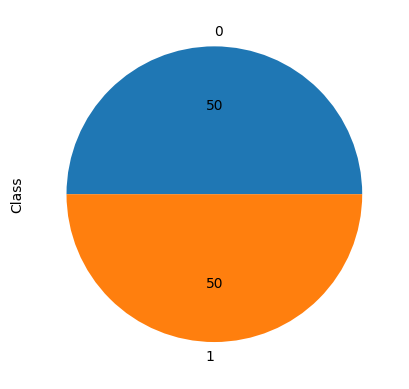

In [ ]:
#visualisation with piechart, with % and numerical d.p. values set to 2 dp
ax = y_rus.value_counts().plot.pie(autopct='%2.f')

In [ ]:
#create final DF for balanced and cleaned dataset
df_clean = pd.merge(X_rus, y_rus, left_index=True, right_index=True)
df_clean.describe

<bound method NDFrame.describe of       Variance  Skewness  Curtosis   Entropy  Class
0     0.659001  0.600789  0.385099  0.747115      0
1     0.751927  0.630916  0.330286  0.776790      0
2     0.870548  0.316958  0.468505  0.727157      0
3     0.682604  0.869718  0.117662  0.469538      0
4     0.867339  0.824685  0.146257  0.621068      0
...        ...       ...       ...       ...    ...
1165  0.334040  0.649054  0.260355  0.619748      1
1166  0.537124  0.557810  0.204491  0.694463      1
1167  0.407690  0.320506  0.627092  0.785980      1
1168  0.250842  0.186909  0.942443  0.621068      1
1169  0.324528  0.481310  0.424883  0.872637      1

[1170 rows x 5 columns]>

In [ ]:
#check correlation of features with target output
df_clean.corr()

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.251708,-0.338373,0.247082,-0.736257
Skewness,0.251708,1.000000,-0.776616,-0.553838,-0.415383
Curtosis,-0.338373,-0.776616,1.000000,0.376595,0.096827
Entropy,0.247082,-0.553838,0.376595,1.000000,-0.029389
Class,-0.736257,-0.415383,0.096827,-0.029389,1.000000


<Axes: >

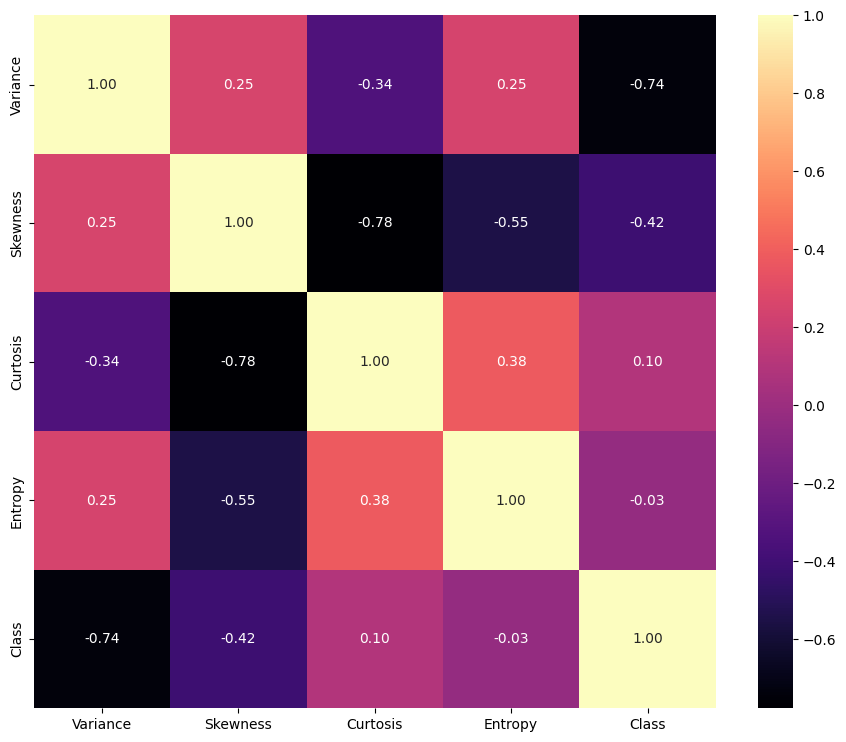

In [ ]:
#by using seaborn heatmap for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#control plotting canvas size
plt.figure(figsize=(11,9))

#by using Pearson correlation
corr = df_clean.corr('pearson')

sns.heatmap(corr, annot=True, cmap='magma', fmt='.2f')

In [ ]:
#since coor is between features and output
'''
set correlation value to + number,
since we only want to choose the features,
don't care about relationship at this point
'''
corr_target = abs(corr.Class)

#set our desired threshold for correlation value of the features
'''
by using 0.4 / 40 pct as minimum correlation threshold
'''

relevant_features = corr_target[corr_target >= .4]
print(relevant_features)

Variance    0.736257
Skewness    0.415383
Class       1.000000
Name: Class, dtype: float64


In [ ]:
print(relevant_features.index)

Index(['Variance', 'Skewness', 'Class'], dtype='object')


In [ ]:
#create final dataframe with relevant features only for model development
'''
features are removed to reduce training time,
however the more features a model is trained with,
the greater the accuracy and precision
'''
df_clean_fin = df_clean[relevant_features.index]
df_clean_fin.describe()

,Variance,Skewness,Class
count,1170.000000,1170.000000,1170.000000
mean,0.529568,0.569759,0.500000
std,0.202261,0.212488,0.500214
min,0.000000,0.000000,0.000000
25%,0.375295,0.433359,0.000000
50%,0.526751,0.579852,0.500000
75%,0.692603,0.737304,1.000000
max,1.000000,1.000000,1.000000


Text(0, 0.5, 'Skewness')

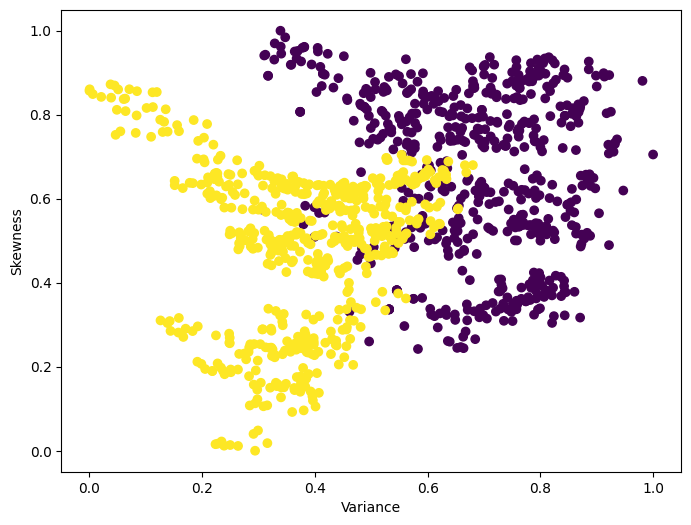

In [ ]:
#visualisation between features and target class

#plotting canvas size
plt.figure(figsize=(8,6))

#by using scatterplot, x, y, c=colour (class)
plt.scatter(x=df_clean_fin.iloc[:,0], y=df_clean_fin.Skewness, c=df_clean_fin.Class)

#labelling the plot axis
plt.xlabel(df_clean_fin.columns[0])
plt.ylabel(df_clean_fin.columns[1])


In [ ]:
#Splitting data for TRAIN and TEST
#input (features)
X = df_clean_fin.iloc[:,:2]

#output (class target)
y = df_clean_fin.Class

print(f'input shape: {X.shape}, output shape: {y.shape}')

input shape: (1170, 2), output shape: (1170,)


In [ ]:
'''
Manage our training dataset in a random way,
so that there is no bias when splitting it into TRAIN and TEST
'''
#By using train_test_split
from sklearn.model_selection import train_test_split

#training and test data : 80 pct(train) : 20 pct(test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

#validation data: 10 pct (0.125*80)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=99)

'''
we could also use the discarded data from undersampling process
'''

'\nwe could also use the discarded data from undersampling process\n'

##3. Modelling

In [ ]:
###selected model

'''
By using KNN from sklearn
'''

from sklearn.neighbors import KNeighborsClassifier

#KNN model to be used in finding the best parameter
knn_test = KNeighborsClassifier()

#performing cross validation
'''
Using K-fold to reduce the likeliness of underfit and overfit

Using CV so that the model accuracy calculated in every fold
and averaged in the end.

using Grid to find the best K values for the neighbours
across the desired parameteres to be set into KNN algorithm
'''
from sklearn.model_selection import GridSearchCV, KFold

cv_params = KFold( n_splits=10, random_state=99, shuffle=True)

#paramters to be tested into KNN algorithm
grid_params_knn = {
    'n_neighbors' : range(1, 40),
    'metric' : ['minkowski','euclidean','manhattan']
    }

gs = GridSearchCV(knn_test, grid_params_knn, cv=cv_params)

#fit training data because model will be trained with this data
gs.fit(X_train, y_train)

#get the best K-value
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 14}

In [ ]:
#KNN model to be used in deployment

#by taking parameter setting from gridsearch result
knn_deployment = KNeighborsClassifier(**gs.best_params_)

#train the model
knn_deployment.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=14)

In [ ]:
#testing the performance of trained model

#by using sklearn
from sklearn import metrics

#by using accuracy as performance metric
accuracy = []
count = []

for iter in range (1,41):
  #param initialisation
  knn_manual = KNeighborsClassifier(n_neighbors=iter, metric='minkowski')

  #train the model
  knn_manual.fit(X_train, y_train)

  #keep the accuracy score
  accuracy.append(knn_manual.score(X_test, y_test))
  count.append(iter)

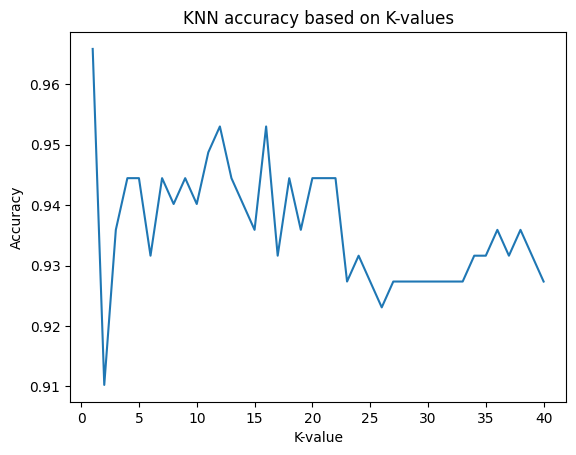

In [ ]:
#visualise the accuracy of KNN with variation of n_neighbours
plt.title('KNN accuracy based on K-values')
plt.plot(count, accuracy)
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
'''
At later point, there is similar performance with greater K-values.
We choose K-values with smaller magnitude because
processing time of the model will reduce
when it has to compare lesser neighbours values
'''

'\nAt later point, there is similar performance with greater K-values.\nWe choose K-values with smaller magnitude because\nprocessing time of the model will reduce\nwhen it has to compare lesser neighbours values\n'

##Deployment

In [ ]:
print(f'input_val_shape: {X_val.shape}, output_val_shape{y_val.shape}')

input_val_shape: (117, 2), output_val_shape(117,)


In [ ]:
#predict the new value of unseen data with trained KNN model
y_pred = knn_deployment.predict(X_val)

In [ ]:
#recording diagnosis / prediction result of our KNN model
diag = []

for iter in range(len(y_pred)):
  if y_pred[iter] == 0:
    diag.append('Authentic Note')
  else:
    diag.append('Counterfeit Note')

#change record to dataframe for ease of visualisation and manipulation
diag = pd.DataFrame(diag, columns=['Predicted_Class'])

In [ ]:
diag.sample(5)

,Predicted_Class
94,Authentic Note
52,Authentic Note
71,Counterfeit Note
2,Authentic Note
53,Counterfeit Note


In [ ]:
diag = pd.merge(diag, y_val, left_index=True, right_index=True)
diag.head()

,Predicted_Class,Class
13,Authentic Note,0
21,Counterfeit Note,0
36,Authentic Note,0
52,Authentic Note,0
55,Authentic Note,0


In [ ]:
#check the accuracy score
knn_deployment.score(X_val, y_val)

0.9572649572649573